#Extracting zip folder

In [2]:
!unzip '/Flowers-Dataset.zip'

'unzip' is not recognized as an internal or external command,
operable program or batch file.


#Image Augmentation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
flowers_datagram = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

NameError: name 'ImageDataGenerator' is not defined

In [9]:
flowers_datagram = ImageDataGenerator(rescale=1./255)

In [10]:
xflowers = flowers_datagram.flow_from_directory('/content/flowers',
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size=100)

Found 4317 images belonging to 5 classes.


#Create Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

#Add Layers

In [12]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))#Convolutional
model.add(MaxPooling2D(pool_size=(2,2)))#MaxPooling
model.add(Flatten())#Flatten
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(5,activation='softmax')) # Output layer

#Compile The Model

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Fit The Model

In [14]:
model.fit_generator(xflowers,
                    steps_per_epoch=len(xflowers),
                    epochs=20,
                    validation_data=xflowers,
                    validation_steps=len(xflowers),)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
44/44 [==============================] - 39s 866ms/step - loss: 1.7324 - accuracy: 0.3658 - val_loss: 1.1521 - val_accuracy: 0.5293
Epoch 2/20
44/44 [==============================] - 37s 861ms/step - loss: 1.0874 - accuracy: 0.5608 - val_loss: 0.9758 - val_accuracy: 0.6196
Epoch 3/20
44/44 [==============================] - 37s 851ms/step - loss: 0.9152 - accuracy: 0.6553 - val_loss: 0.7594 - val_accuracy: 0.7406
Epoch 4/20
44/44 [==============================] - 39s 880ms/step - loss: 0.7421 - accuracy: 0.7334 - val_loss: 0.6137 - val_accuracy: 0.8135
Epoch 5/20
44/44 [==============================] - 38s 855ms/step - loss: 0.5641 - accuracy: 0.8057 - val_loss: 0.4469 - val_accuracy: 0.8747
Epoch 6/20
44/44 [==============================] - 44s 1000ms/step - loss: 0.3917 - accuracy: 0.8807 - val_loss: 0.2647 - val_accuracy: 0.9268
Epoch 7/20
44/44 [==============================] - 38s 855ms/step - loss: 0.2496 - accuracy: 0.9284 - val_loss: 0.1807 - val_accuracy: 0.953

#Save Model

In [15]:
model.save('flowers.h5')

#Testing Model

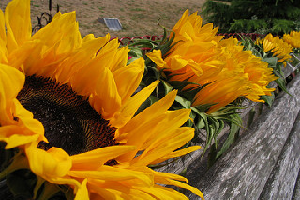

In [17]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/flowers/sunflower/4814106562_7c3564d2d9_n.jpg',target_size=(200,300))
img

In [18]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/flowers/daisy/15813862117_dedcd1c56f_m.jpg',target_size=(60,60))
x = image.img_to_array(img)
x

array([[[220., 222., 219.],
        [219., 221., 218.],
        [220., 222., 219.],
        ...,
        [212., 213., 208.],
        [212., 213., 208.],
        [210., 213., 206.]],

       [[219., 221., 218.],
        [220., 222., 219.],
        [219., 221., 218.],
        ...,
        [212., 213., 208.],
        [211., 212., 207.],
        [210., 212., 207.]],

       [[220., 222., 219.],
        [220., 222., 219.],
        [220., 222., 219.],
        ...,
        [212., 213., 207.],
        [212., 213., 207.],
        [211., 212., 206.]],

       ...,

       [[134.,  97.,  70.],
        [135.,  98.,  71.],
        [133.,  96.,  69.],
        ...,
        [131.,  91.,  65.],
        [131.,  89.,  64.],
        [130.,  90.,  64.]],

       [[141., 104.,  77.],
        [142., 105.,  78.],
        [143., 106.,  79.],
        ...,
        [135.,  95.,  69.],
        [135.,  95.,  69.],
        [132.,  92.,  66.]],

       [[141., 104.,  77.],
        [140., 103.,  76.],
        [137., 1

In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img('/content/flowers/rose/5182167964_9d1a0be0b8_n.jpg',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
model.predict(x)

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [20]:
# Testing 2

xflowers.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [23]:
# Testing 3

img = image.load_img('/content/flowers/rose/5182167964_9d1a0be0b8_n.jpg',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
print(pred)
print(op[pred])

2
rose
